## 项目: 机票航班延误预测

欢迎来到机票航班延误预测的实战项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

我们知道，航班延误对于旅客、售卖机票的平台以及航空公司都是一个比较头疼的问题。造成航班延误的因素有很多，包括台风、雾霾、飞机故障、航空管制等等原因。在这个项目中，我们将探索在飞机起飞前2小时做航班延误预测这个实际问题，你将从实际问题出发，探索数据，抽取数据特征，构建模型并作出预测。

这个项目的数据来自[航班动态起降数据集](https://www.kesci.com/home/dataset/59793a5a0d84640e9b2fedd3)（数据集由和鲸社区提供），该数据集用2015年5月到2017年5月的机场情况作为训练集，用201年6月作为测试集。你可以通过报名该比赛获取数据集，另外，为了方便大家获取数据，我们也提供了一个[下载地址](https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd101/MLND+documents/data.zip)，请下载后放置data文件夹中。

**数据说明：**


- ./data/2015年5月到2017年5月城市天气.csv
- ./data/2015年5月到2017年5月航班动态数据.csv
- ./data/2015年5月到2017年5月特情.xlsx
- ./data/机场城市对应表.xlsx


 运行下面区域的代码以载入一些此项目所需的Python库。如果成功返回提示语句，则说明载入成功。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('你已经成功载入所需要的库！')

你已经成功载入所需要的库！


## 数据初探

### 导入数据
我们先导入数据，然后观察头部数据。可以使用[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) 分别加载对应格式的数据，然后使用[head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [2]:
# 文件路径 './data/2015年5月到2017年5月航班动态数据.csv'
# 注意使用字符编码 encoding="gb2312"
# TODO: 根据以上提示信息，导入航班数据
flight_data = pd.read_csv("./data/2015年5月到2017年5月航班动态数据.csv",encoding="gb2312")

# 文件路径 "./data/2015年5月到2017年5月城市天气.csv"
# TODO：根据以上提示信息，导入天气数据
weather = pd.read_csv("./data/2015年5月到2017年5月城市天气.csv")

# 文件路径 "./data/机场城市对应表.xlsx"
# TODO：根据以上提示信息，导入城市与机场对应数据
airport_city = pd.read_excel("./data/机场城市对应表.xlsx",encoding="gb2312")

# 文件路径 "./data/2015年5月到2017年5月特情.xlsx"
# TODO：根据以上提示信息，导入特情数据
special = pd.read_excel("./data/2015年5月到2017年5月特情.xlsx",encoding="gb2312")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 观察数据
使用 [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [4]:
# 观察航班数据
flight_data.head()

# 观察天气数据
weather.head()

# 通过观察，发现有一列没有用的空表格 “Unnamed: 5”，你需要使用 `del` 将其从 `weather` 数据中删除
del weather["Unnamed: 5"]

# 观察城市与机场对应数据
#airport_city.head()

# 观察特情数据
#special.head()



KeyError: 'Unnamed: 5'

#### 问题1：我们知道，一个有监督学习问题是总有一个需要预测的目标值，那么在这个问题中，你通过了解此问题的背景以及观察以上的数据，认为此任务中的目标值是什么？在已有的数据中，给出了预测目标值吗？如果没有的话，我们要如何获得这个目标值呢？

回答问题：目标是检测航班是否延误   没有   在飞行数据中对比计划起飞时间与实际起飞时间相差时间来获取

### 整理targets值

根据以上对数据的初步观察，我们发现，这样的实际问题的数据是非常不规整的。数据的targets标签并没有显式地给出，而是需要自己整理。在这一小节，我们根据飞行数据 `flight_data` 整理出我们需要的targets。

我们首先定义延误时间：实际起飞时间与计划起飞时间的差；然后，我们以延误时长是否超过3小时来定义targets。同时观察到“航班是否取消”这一列数据，针对数据中的“取消”的航班，我们直接可以将其延误时间设置成12小时。

**建议**：用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择延误时间是否超过三小时，如果超过三小时则延误目标值取1，否则延误目标值取0；另外也用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择`flight_data['航班是否取消']`是否为 `取消`,如果是取消则直接可以将其延误时间设置成12小时。

In [5]:
# TODO：计算 起飞延误时间，以小时为单位，注意将单位秒转换为单位小时
flight_data['起飞延误时间'] = (flight_data['实际起飞时间'] - flight_data['计划起飞时间'])/3600000
flight_data["起飞延误时间"] = np.where(flight_data['航班是否取消']=="取消" ,12,0)

# TODO：`light_data['航班是否取消']是否为 “取消”,如果是取消则直接可以将其延误时间设置成12小时
flight_data["飞机延误目标"] = np.where(flight_data['起飞延误时间']>3 ,1,0)

#flight_data.head()
new = np.where(flight_data['飞机延误目标']==1)
print(type(new))
print(len(new[0]))
"""
for i in range(len(new[0])):
    print(new[0][i])
    
    
#print(new.shape)
"""

<class 'tuple'>
323353


'\nfor i in range(len(new[0])):\n    print(new[0][i])\n    \n    \n#print(new.shape)\n'

### 整理简单features

在课程中，所讲解的案例使用的是比较干净的数据集，然而在真实业务场景里，却很少有直接可用的数据，我们往往需要从复杂的数据中提取重要的特征来帮助我们解决实际问题。正如当前所做的项目，我们无法直接使用所有数据，而是需要进行数据归并、删选、提取重要的特征。

在整理完我们的目标值之后，我们可以开始进行特征工程。根据以上的几个文件，我们可以得到很多特征，在这里，我们先抽取一个简单的特征，学习一遍在处理实际数据时的特征工程流程。

我们所抽取的特征是 `weather`中的“天气”数据。但我们发现 `weather` 中的数据并不是直接可用的，而是需要我们将该天气数据按照日期和城市对齐至飞行数据`flight_data`中。具体来说，我们参考下面的图片![merge_data](./figure/merge_feature.png)

- 我们先要将天气 `weather`中的“城市”一列的数据，通过机场城市`airport_city`数据中的“城市名称”和“城市编码”，将 `weather`中的“城市”转化为“城市编码”，这样才能跟`flight_data`中的机场编码对应上。
- 然后我们要将 `weather`中的“日期”一列的数据对齐至`flight_data`中“计划起飞时间”上。但是，我们发现“计划起飞时间”是以秒为单位的浮点格式数据，因此我们还需要将“计划起飞时间”转换成和`weather`中的“日期”一样的时间格式。

接下来就是按以上的步骤进行操作

首先，利用 [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) ，按`airport_city`中的城市名称和城市编码，将 `weather`中的城市名称转化为城市编码。

In [6]:
# TODO: 将机场编码对应到天气数据上面，根据城市名，注意 weather 数据是【城市】，而 airport_city 是【城市名称】
print("airport_weather.shape",type(weather))

airport_weather = weather.merge(airport_city,left_on='城市',right_on ='城市名称')

# # 去除缺失值和重复的机场天气信息 
#del airport_weather[]
airport_weather = airport_weather.dropna()
airport_weather = airport_weather.drop_duplicates(['日期','机场编码'])
airport_weather.head()

airport_weather.shape <class 'pandas.core.frame.DataFrame'>


,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,厦门,阴,21,26,2015-05-01,XMN,厦门
1,厦门,雷阵雨转阵雨,21,29,2015-05-02,XMN,厦门
2,厦门,阵雨,21,30,2015-05-03,XMN,厦门
3,厦门,阵雨,19,25,2015-05-04,XMN,厦门
4,厦门,阵雨转阴,18,22,2015-05-05,XMN,厦门


我们发现，数据`airport_weather`中的“日期”格式和`flight_data`中的“计划起飞时间”格式是不一致的，为了能够将机场天气数据`airport_weather`按照“日期”归并至飞行数据`flight_data`中，我们首先需要将`flight_data`中的“计划起飞时间”格式转化成年月日统一格式。可以先用[to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)将浮点类型的数据转化为日期格式，然后再将日期格式的数据转化为 统一的 年月日格式。

In [7]:
# TODO：利用 to_datetime  浮点类型的数据转化为时间数据，单位为秒，utc时间为True

flight_data['计划起飞日期tmp'] = pd.to_datetime(flight_data['计划起飞时间'], unit='s') 
flight_data['计划起飞日期tmp'] = pd.to_datetime(flight_data['计划起飞日期tmp'], format='%Y%m%d', errors='ignore') 
#print(flight_data['计划起飞日期tmp'])
# 再将日期格式的数据转化为 统一的 年月日格式。
flight_data['计划起飞日期'] = flight_data['计划起飞日期tmp'].apply(lambda x:x.strftime('%Y-%m-%d') if not(pd.isnull(x)) else None)
#flight_data = flight_data.drop()
flight_data.head()


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0,0,2016-01-26 12:00:00,2016-01-26
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0,0,2016-01-14 08:40:00,2016-01-14
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0,0,2016-01-26 09:35:00,2016-01-26
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0,0,2016-01-06 22:50:00,2016-01-06
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0,0,2016-01-10 04:10:00,2016-01-10


然后，再次利用[merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)，根据机场名称和日期信息，将机场天气`weather`数据对应到飞行数据 `flight_data` 中。注意，`flight_data`中是“出发机场”和“计划起飞日期”,而 `airport_weather`中对应的是“机场编码”和“日期”。

In [8]:
# TODO: merge flight_data 和 airport_weather
flight_data = flight_data.merge(airport_weather,left_on=['出发机场','计划起飞日期'],right_on=['机场编码','日期'])
print(flight_data.shape)
flight_data.head(6)


(7396406, 20)


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0,0,2016-01-26 12:00:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
1,HGH,BFJ,GJ8823,1453848600,1453858800,1.453850e+09,1.453860e+09,33.0,正常,0,0,2016-01-26 22:50:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
2,HGH,GYS,CA1773,1453767600,1453777800,1.453768e+09,1.453778e+09,1528.0,正常,0,0,2016-01-26 00:20:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
3,HGH,HRB,CZ6665,1453780800,1453791900,1.453781e+09,1.453792e+09,1185.0,正常,0,0,2016-01-26 04:00:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
4,HGH,SHE,CZ3909,1453784700,1453794300,1.453785e+09,1.453794e+09,433.0,正常,0,0,2016-01-26 05:05:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
5,HGH,SYX,JD5164,1453818000,1453828800,1.453819e+09,1.453829e+09,1478.0,正常,0,0,2016-01-26 14:20:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州


In [9]:
flight_data.info()
flight_data.sample(frac=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7396406 entries, 0 to 7396405
Data columns (total 20 columns):
出发机场         object
到达机场         object
航班编号         object
计划起飞时间       int64
计划到达时间       int64
实际起飞时间       float64
实际到达时间       float64
飞机编号         float64
航班是否取消       object
起飞延误时间       int32
飞机延误目标       int32
计划起飞日期tmp    datetime64[ns]
计划起飞日期       object
城市           object
天气           object
最低气温         object
最高气温         object
日期           object
机场编码         object
城市名称         object
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(12)
memory usage: 1.1+ GB


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
3993851,XIY,PEK,MU2334,1486718400,1486725600,1.486720e+09,1.486725e+09,NaN,正常,0,0,2017-02-10 09:20:00,2017-02-10,西安,多云,-2,7,2017-02-10,XIY,西安
2879861,PVG,WUH,MU2692,1476854400,1476861900,1.476855e+09,1.476860e+09,1553.0,正常,0,0,2016-10-19 05:20:00,2016-10-19,上海,小雨,20,24,2016-10-19,PVG,上海
948927,XIY,BAV,G52845,1460069700,1460075100,1.460069e+09,1.460074e+09,1373.0,正常,0,0,2016-04-07 22:55:00,2016-04-07,西安,多云,12,19,2016-04-07,XIY,西安
1430472,AOG,PEK,CZ6113,1462855200,1462860600,1.462855e+09,1.462860e+09,578.0,正常,0,0,2016-05-10 04:40:00,2016-05-10,鞍山,晴,15,26,2016-05-10,AOG,鞍山
5181501,HAK,CSX,HU7297,1450420200,1450427700,1.450421e+09,1.450427e+09,2101.0,正常,0,0,2015-12-18 06:30:00,2015-12-18,海口,多云,16,18,2015-12-18,HAK,海口
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942503,NAY,NNY,KN5837,1475663100,1475669700,1.475663e+09,1.475669e+09,264.0,正常,0,0,2016-10-05 10:25:00,2016-10-05,北京,多云,13,21,2016-10-05,NAY,北京
3844064,NAY,SZX,KN5855,1485644400,1485656400,1.485644e+09,1.485656e+09,2752.0,正常,0,0,2017-01-28 23:00:00,2017-01-28,北京,多云,-3,4,2017-01-28,NAY,北京
7082015,HET,TGO,G52773,1433981100,1433986800,NaN,NaN,97.0,取消,12,1,2015-06-11 00:05:00,2015-06-11,呼和浩特,多云转阵雨,10,21,2015-06-11,HET,呼和浩特
4918974,DLC,CGO,PN6280,1494726300,1494732900,1.494726e+09,1.494732e+09,1969.0,正常,0,0,2017-05-14 01:45:00,2017-05-14,大连,晴,13,21,2017-05-14,DLC,大连


## 建立简单模型

### 特征处理
我们可以先建立一个最简单的模型，从飞行数据`flight_data`中挑选2列数据作为features，其中一个是我们刚刚构造好的“天气”数据，另外一个feature由你来选择。注意，其中“飞机延误时间”和“飞机延误目标”并不是feature，而是targets，所以不能选择这两列作为features。

#### 问题2：你选择的特征是特征是什么？说说你选择这个feature的理由。

回答问题：最低气温  天气中的最低温度是影响航班是否正常的另一重要因素

In [10]:
# TODO: 选择一列数据作为feature
features = ["天气"]
add_to_feature = "最低气温"  # 你选择的feature
features.append(add_to_feature)
data = flight_data[features]

data.head()


,天气,最低气温
0,晴转阴,1
1,晴转阴,1
2,晴转阴,1
3,晴转阴,1
4,晴转阴,1


In [14]:
# TODO：从 flight_data 中取出目标"飞机延误目标"的值，numpy格式的值
targets = np.array(flight_data["飞机延误目标"])
#print(targets)
#df2 = df1[['t_idx', 'bike_in_cnt']][df1['bike_in_cnt'] > 10]
targets_tmp = flight_data[["飞机延误目标"]][flight_data["飞机延误目标"]==1]
print(targets_tmp)
# train_data 的数据量和 targets 的数据量一定是相等的
#print(type(targets))
assert len(data) == len(targets)

         飞机延误目标
118           1
138           1
143           1
171           1
230           1
...         ...
7396377       1
7396386       1
7396387       1
7396392       1
7396400       1

[314231 rows x 1 columns]


到这里，我们已经提取完并得到两个特征，但是现在的特征是非数值类型的，那么我们需要先对这些非数值类型的特征进行编码。

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

因此，**独热编码**将会对特征进行扩维，例如上面对例子，将对单个特征`someFeature` 扩充成3个特征`someFeature_A`, `someFeature_B`和`someFeature_C`，这种独热编码，你可以参考one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) 解释和实现以及使用。

另一种对非数值类型对特征进行编码对方法是直接对字符编号，例如 `someFeature` 由 1.0、2.0、3.0 来作为特征值进入模型对计算。更进一步来说，这种方法如果类型比较多对话，将会导致特征空间太离散，影响模型对建模性能。于是我们需要对这些数值进行归一化，针对该问题，在我们实际业务场景中经常使用对解决方案是使用的编码方式是 [sklearn.preprocessing.LabelEncoder.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)，它会将离散的字符映射到一个数值，用以表示该特征并参与模型计算。


#### 问题3：请参考文档简单介绍一下 `LabelEncoder.fit_transform`，说一下该方法和独热表示one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)有什么区别，并根据刚刚构造好对`天气`特征包含对类别数量等统计信息来回答这里为什么用 `fit_transform`？

回答问题：

In [ ]:
LabelEncoder.fit_transform 将各类别按照自然数分类，并提供了从自然数编码倒推特征的API
get_dummies  提供了转换成热独编码的API
选用fit_transform是该场景下，用简单的自然数分类能很好区分特征类别


判断数据中是否存在缺省值的情况，如果存在，请处理缺省值。

建议，你可以通过 `any(isnull())`[isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)去判断数据中是否存在缺失情况；然后通过[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)去填补缺省值

In [11]:
# TODO：判断并处理`data`中的缺省值
#df = pd.DataFrame([['ant', 'bee', 'cat'], ['dog', None, 'fly']])
#df[1]
#pd.isna(data)
pd.isnull(data)

,天气,最低气温
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7396401,False,False
7396402,False,False
7396403,False,False
7396404,False,False


In [15]:
from sklearn import preprocessing
string_encoder = preprocessing.LabelEncoder()
# 我们首先对天气特征的进行编码
data["天气"] = string_encoder.fit_transform(data["天气"])

# TODO：对你选择的特征进行编码，如果你选择的是数值类型的特征，那么你可以按照前面所学知识进行归一化等处理
#print(type(data[add_to_feature][0]))
data[add_to_feature] = pd.to_numeric(data[add_to_feature], errors='coerce')

data[add_to_feature] = (data[add_to_feature] - data[add_to_feature].min())/(data[add_to_feature].max() - data[add_to_feature].min())
print(data[add_to_feature])


0          0.558442
1          0.558442
2          0.558442
3          0.558442
4          0.558442
             ...   
7396401    0.792208
7396402    0.649351
7396403    0.532468
7396404    0.753247
7396405    0.818182
Name: 最低气温, Length: 7396406, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

### 模型构建

现在我们可以根据上面构造好的feature和target来构建一个简单的模型。

- 第一步：使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例切分训练集和测试集；
- 第二步：继续使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例切分训练集和测试集；


In [16]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'data'和'targets'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2, random_state = 0)

# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4733699 samples.
Validation set has 1183425 samples.
Testing set has 1479282 samples.


### 监督学习模型
### 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）



#### 问题4: 从上面的监督学习模型中选择两个适合我们这个问题的模型，并回答相应问题。然后从中选择一个先在我们等数据集上进行训练和测试，这一步是为了初步感受模型在此数据集上等表现。

#### 模型1

**模型名称**

回答： 决策树

**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：
银行要用机器学习算法来确定是否给客户发放贷款，为此需要考察客户的年收入，是否有房产这两个指标。

https://easyai.tech/ai-definition/decision-tree/#what

**这个模型的优势是什么？他什么情况下表现最好？**

回答：
优势：
决策树易于理解和解释，可以可视化分析，容易提取出规则；
可以同时处理标称型和数值型数据；
比较适合处理有缺失属性的样本；
能够处理不相关的特征；
测试数据集时，运行速度比较快；
在相对短的时间内能够对大型数据源做出可行且效果良好的结果。
表现最好情况：
可以同时处理标称型和数值型数据




**这个模型的缺点是什么？什么条件下它表现很差？**

回答：
缺点：
容易发生过拟合（若用随机森林可以很大程度上减少过拟合）；
容易忽略数据集中属性的相互关联；
对于那些各类别样本数量不一致的数据，在决策树中，进行属性划分时，不同的判定准则会带来不同的属性选择倾向；信息增益准则对可取数目较多的属性有所偏好（典型代表ID3算法），而增益率准则（CART）则对可取数目较少的属性有所偏好，但CART进行属性划分时候不再简单地直接利用增益率尽心划分，而是采用一种启发式规则）（只要是使用了信息增益，都有这个缺点，如RF）。
ID3算法计算信息增益时结果偏向数值比较多的特征。
表现最差条件：
对于那些各类别样本数量不一致的数据，在决策树中，进行属性划分时，不同的判定准则会带来不同的属性选择倾向

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：
在相对短的时间内能够对大型数据源做出可行且效果良好的结果

#### 模型2

**模型名称**

回答：logisticRegression


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：一封邮件是垃圾邮件的肯能性（是、不是）
https://easyai.tech/ai-definition/logistic-regression/

**这个模型的优势是什么？他什么情况下表现最好？**

回答：
实现简单，广泛的应用于工业问题上；
分类时计算量非常小，速度很快，存储资源低；
便利的观测样本概率分数；
对逻辑回归而言，多重共线性并不是问题，它可以结合L2正则化来解决该问题；
计算代价不高，易于理解和实现

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：
当特征空间很大时，逻辑回归的性能不是很好；
容易欠拟合，一般准确度不太高
不能很好地处理大量多类特征或变量；
只能处理两分类问题（在此基础上衍生出来的softmax可以用于多分类），且必须线性可分；
对于非线性特征，需要进行转换；

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：
主要解决二分类问题，用来表示某件事情发生的可能性,与本项目场景符合

### 评价模型性能
在这一部分中，我们选择上面两个模型之一来训练。

在这个，分类预测问题中，我们使用**准确率**作为评价模型等标准，同时能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。


由于数据量比较大，模型训练可能需要一些时间来运行！

In [17]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  #需要导入的包
f = open('e:/decisiontree.dot', 'w')



#from sklearn.metrics import accuracy_score
#scorer = make_scorer(f1_score)
#f1_scorer = make_scorer(fbeta_score, beta=1)
dt = DecisionTreeClassifier(max_depth=1)

#clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
"""
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
"""

# Run a randomized search over the hyperparameters
#random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
dt.fit(X_train, y_train)
pr = dt.predict(X_val)
# Make predictions on the test data
#rf_preds = random_search.best_estimator_.predict(X_test)

#ch.print_metrics(y_test, rf_preds, 'random forest')
# TODO：从sklearn中导入上面你选择等一个监督学习模型


# TODO：设置模型参数，初始化这个模型

# TODO：在训练集 X_train, y_train 上训练该模型

# TODO：在验证集 X_val, y_val 上预测并计算socre fbeta_score和accuracy_score

f_score = f1_score(pr,y_val)
acc = accuracy_score(pr,y_val)
tree.export_graphviz(dt,out_file=f)
# 打印 fbeta_score和accuracy_score
print("Train and valid successed. F-score: {}, Acc: {}".format(f_score, acc))


Train and valid successed. F-score: 0.0, Acc: 0.9573272492975896


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)



#### 问题5： 用通俗的话解释模型

*用一到两段话，用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

回答问题：
该决策树模型通过天气和最低气温两个特征,分析数据，选出合适阈值建立模型，将数据最大程度的分类，然后用该模型对测试数据集进行预测并对比正确率


### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [18]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
import random
#random.seed(42)
# TODO：初始化分类器
clf = DecisionTreeClassifier(random_state=42)
# TODO：创建你希望调节的参数列表
parameters = {'max_depth':[1,2,4,8,16,32]}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(f1_score)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters,scoring=scorer)
# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

f1_score_training = f1_score(predictions,y_val)
f1_score_test = f1_score(best_predictions,y_val)
print("f1_score_training=",f1_score_training ,"f1_score_test=",f1_score_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classif

f1_score_training= 0.012158770003137748 f1_score_test= 0.012158770003137748


### 特征重要性分析
在做数据分析过程中，我们需要分析抽取出来的特征对预测的贡献，以得出特征的重要性。特征重要性分析能够帮助我们继续进行相关的特征工程，比如过滤一些没有贡献的特征，加强一些比较重要的特征。


选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

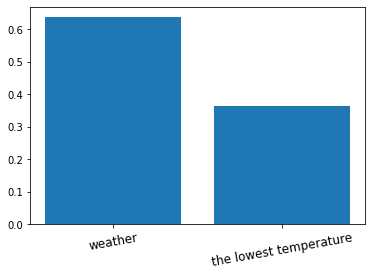

In [19]:
# TODO：导入一个有'feature_importances_'的监督学习模型

# TODO：在训练集上训练一个监督学习模型，初始化
model = clf
# TODO: fit 训练集
#model.fit()


import matplotlib.pyplot as plt
features = ["weather", "the lowest temperature"]

feature_important = model.feature_importances_
#plt.figure(figsize=(12,8))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=12,rotation=10)
plt.show()


#### 问题6：哪一个特征更加重要？这符合你的直觉吗？谈谈你在平时的项目中在做特征工程时，对于使用符合直觉的特征的看法，可以举例说明。

回答问题：天气，符合，遇到符合直觉的特征时就会感觉对数据增加了一份自信心，对模型的怀疑就降低了，在选择特征时都是先依据经验选择符合自己直觉的特征来预测，比如预测房价的时候，会首先选取房子面积作为影响价格的最重要因素。

## 模型对比

目前为止，我们已经对一个实际问题的复杂的数据进行了处理，并抽取了一两个特征，然后进行了模型训练。你可以按照这个流程做更多的特征工程的工作。由于数据量大，我们已经做好了特征工程，同时我们也sample了部分数据，方便接下来对不同模型进行比较。

这一小节，我们要学习在具体业务场景经常使用的模型，梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）。GBDT在工业场景和各大数据挖掘比赛中都是非常流行的模型，在这里，我们尝试对这些流行对模型进行初探。

#### 问题7：通俗的解释什么是 梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）？并列举其优缺点。

回答问题：
GBDT(Gradient Boosting Decision Tree) 又叫 MART（Multiple Additive Regression Tree)，是一种迭代的决策树算法，该算法由多棵决策树组成，所有树的结论累加起来做最终答案(https://www.jianshu.com/p/6755107e816d)
优点：
GBDT几乎可用于所有回归问题（线性/非线性），相对logistic regression仅能用于线性回归，GBDT的适用面非常广。亦可用于二分类问题（设定阈值，大于阈值为正例，反之为负例）。

#### 问题8：目前比较流行的 `GBDT`的变种有 [Xgboost](https://xgboost.readthedocs.io/en/latest/) 和 [LightGBM](https://lightgbm.readthedocs.io/en/latest/)，请比较这三个梯度提升模型，列举他们各自的特点? （你可以参考一些文档，并给出你的引用出处）

回答问题：
GBDT
梯度提升树实在提升树的基础上发展而来的一种使用范围更广的方法，当处理回归问题时，提升树可以看作是梯度提升树的特例(分类问题时是不是特例？)。 因为提升树在构建树每一步的过程中都是去拟合上一步获得模型在训练集上的残差。后面我们将会介绍，这个残存正好是损失函数的梯度，对应于GBDT每一步要拟合的对象。

主要思想
在目标函数所在的函数空间中做梯度下降，即把待求的函数模型当作参数，每一步要拟合目标函数关于上一步获得的模型的梯度，从而使得参数朝着最小化目标函数的方向更新。

一些特性
每次迭代获得的决策树模型都要乘以一个缩减系数，从而降低每棵树的作用，提升可学习空间。
每次迭代拟合的是一阶梯度。
XGBoost
XGBoost 是GBDT的一个变种，最大的区别是xgboost通过对目标函数做二阶泰勒展开，从而求出下一步要拟合的树的叶子节点权重（需要先确定树的结构），从而根据损失函数求出每一次分裂节点的损失减小的大小，从而根据分裂损失选择合适的属性进行分裂。

这个利用二阶展开的到的损失函数公式与分裂节点的过程是息息相关的。先遍历所有节点的所有属性进行分裂，假设选择了这个a属性的一个取值作为分裂节点，根据泰勒展开求得的公式可计算该树结构各个叶子节点的权重，从而计算损失减小的程度，从而综合各个属性选择使得损失减小最大的那个特征作为当前节点的分裂属性。依次类推，直到满足终止条件。

一些特性
除了类似于GBDT的缩减系数外，xgboost对每棵树的叶子节点个数和权重都做了惩罚，避免过拟合

类似于随机森林，XGBoost在构建树的过程中，对每棵树随机选择一些属性作为分裂属性。

分裂算法有两种，一种是精确的分裂，一种是近似分裂算法，精确分裂算法就是把每个属性的每个取值都当作一次阈值进行遍历，采用的决策树是CART。近似分裂算法是对每个属性的所有取值进行分桶，按照各个桶之间的值作为划分阈值，xgboost提出了一个特殊的分桶策略，一般的分桶策略是每个样本的权重都是相同 的，但是xgboost使每个样本的权重为损失函数在该样本点的二阶导(泰勒展开不应该是损失函数关于模型的展开吗？为什么会有在该样本点的二阶导这种说法？ 因为模型是对所有样本点都通用的，把该样本输入到二阶导公式中就可以得到了)。

xgboost添加了对稀疏数据的支持，在计算分裂收益的时候只利用没有missing值的那些样本，但是在推理的时候，也就是在确定了树的结构，需要将样本映射到叶子节点的时候，需要对含有缺失值的样本进行划分，xgboost分别假设该样本属于左子树和右子树，比较两者分裂增益，选择增益较大的那一边作为该样本的分裂方向。

xgboost在实现上支持并行化，这里的并行化并不是类似于rf那样树与树之间的并行化，xgboost同boosting方法一样，在树的粒度上是串行的，但是在构建树的过程中，也就是在分裂节点的时候支持并行化，比如同时计算多个属性的多个取值作为分裂特征及其值，然后选择收益最大的特征及其取值对节点分裂。

xgboost 在实现时，需要将所有数据导入内存，做一次pre-sort（exact algorithm），这样在选择分裂节点时比较迅速。

缺点
level-wise 建树方式对当前层的所有叶子节点一视同仁，有些叶子节点分裂收益非常小，对结果没影响，但还是要分裂，加重了计算代价。
预排序方法空间消耗比较大，不仅要保存特征值，也要保存特征的排序索引，同时时间消耗也大，在遍历每个分裂点时都要计算分裂增益(不过这个缺点可以被近似算法所克服)
lightGBM
https://github.com/Microsoft/LightGBM/wiki/Features
关于lightGBM的论文目前并没有放出来，只是从网上一些信息得出以下的一些与xgboost不同的地方：

xgboost采用的是level-wise的分裂策略，而lightGBM采用了leaf-wise的策略，区别是xgboost对每一层所有节点做无差别分裂，可能有些节点的增益非常小，对结果影响不大，但是xgboost也进行了分裂，带来了务必要的开销。 leaft-wise的做法是在当前所有叶子节点中选择分裂收益最大的节点进行分裂，如此递归进行，很明显leaf-wise这种做法容易过拟合，因为容易陷入比较高的深度中，因此需要对最大深度做限制，从而避免过拟合。

lightgbm使用了基于histogram的决策树算法，这一点不同与xgboost中的 exact 算法，histogram算法在内存和计算代价上都有不小优势。
-. 内存上优势：很明显，直方图算法的内存消耗为(#data* #features * 1Bytes)(因为对特征分桶后只需保存特征离散化之后的值)，而xgboost的exact算法内存消耗为：(2 * #data * #features* 4Bytes)，因为xgboost既要保存原始feature的值，也要保存这个值的顺序索引，这些值需要32位的浮点数来保存。
-. 计算上的优势，预排序算法在选择好分裂特征计算分裂收益时需要遍历所有样本的特征值，时间为(#data),而直方图算法只需要遍历桶就行了，时间为(#bin)

直方图做差加速
-. 一个子节点的直方图可以通过父节点的直方图减去兄弟节点的直方图得到，从而加速计算。

lightgbm支持直接输入categorical 的feature
-. 在对离散特征分裂时，每个取值都当作一个桶，分裂时的增益算的是”是否属于某个category“的gain。类似于one-hot编码。

但实际上xgboost的近似直方图算法也类似于lightgbm这里的直方图算法，为什么xgboost的近似算法比lightgbm还是慢很多呢？
-. xgboost在每一层都动态构建直方图， 因为xgboost的直方图算法不是针对某个特定的feature，而是所有feature共享一个直方图(每个样本的权重是二阶导),所以每一层都要重新构建直方图，而lightgbm中对每个特征都有一个直方图，所以构建一次直方图就够了。
-. lightgbm做了cache优化？

lightgbm哪些方面做了并行？
-. feature parallel
一般的feature parallel就是对数据做垂直分割（partiion data vertically，就是对属性分割），然后将分割后的数据分散到各个workder上，各个workers计算其拥有的数据的best splits point, 之后再汇总得到全局最优分割点。但是lightgbm说这种方法通讯开销比较大，lightgbm的做法是每个worker都拥有所有数据，再分割？（没懂，既然每个worker都有所有数据了，再汇总有什么意义？这个并行体现在哪里？？）
-. data parallel
传统的data parallel是将对数据集进行划分，也叫 平行分割(partion data horizontally)， 分散到各个workers上之后，workers对得到的数据做直方图，汇总各个workers的直方图得到全局的直方图。 lightgbm也claim这个操作的通讯开销较大，lightgbm的做法是使用”Reduce Scatter“机制，不汇总所有直方图，只汇总不同worker的不同feature的直方图(原理？)，在这个汇总的直方图上做split，最后同步。
参考：https://github.com/Microsoft/LightGBM/wiki/Features

整个回答参考了博客https://www.cnblogs.com/mata123/p/7440774.html


我们已经预先对该数据做了充分的特征工程，然后 `sample` 出了部分数据。数据在路径 `./data/`下面，有训练集`train.csv`和测试集`test.csv`

In [26]:
# 直接运行读取数据，并分别得到 X 和 Y 的数据

# 处理训练集
train_x = pd.read_csv("./data/train.csv")

train_y = train_x["飞机延误目标"].values
print("train_x.shape=",train_x.shape)
print("train_y.shape=",train_y.shape)
del(train_x["飞机延误目标"])
print("删除后train_x.shape=",train_x.shape)
# 处理测试集
test_x = pd.read_csv("./data/test.csv")
test_y = test_x["飞机延误目标"].values
print("test_x.shape=",test_x.shape)
print("test_y.shape=",test_y.shape)
del(test_x["飞机延误目标"])
print("删除后test_x.shape=",test_x.shape)

train_x.shape= (20000, 20)
train_y.shape= (20000,)
删除后train_x.shape= (20000, 19)
test_x.shape= (6000, 20)
test_y.shape= (6000,)
删除后test_x.shape= (6000, 19)


### 对 gbdt 进行调参

按照上面简单模型构建部分的流程，先定义一个梯度提升决策树分类器 GradientBoostingClassifier，并设置里面固定参数；然后设置需要调优的参数，然后通过 网格搜索 `GridSearchCV` 进行搜索最优参数。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer,accuracy_score
import datetime
start = datetime.datetime.now()
scorer = make_scorer(f1_score)
# TODO: 需要调的参数，比如 max_depth, n_estimators, learning_rate
cv_params = {'max_depth':[2,4,8,16], 'n_estimators':[1,2,3,4,5],'learning_rate':[0.1,0.2,0.3,0.5]}


#TODO：设置 GBDT 分类器 GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=10)
# TODO: 设置 GridSearchCV
grid_cv = GridSearchCV(estimator=model,param_grid=cv_params,scoring=scorer,iid=False,cv=5)
# TODO: 模型训练
grid_cv.fit(train_x, train_y)

# TODO：在测试集上预测，并计算accuracy和f-score
best_predictions = grid_cv.best_estimator_.predict(test_x)
f1_score_test = f1_score(best_predictions,test_y)
accuracy = metrics.accuracy_score(best_predictions,test_y)
print("f1_score_test=",f1_score_test,"accuracy=",accuracy)
end = datetime.datetime.now()
print("cost time s=",end-start)
# TODO：打印最优参数


f1_score_test= 0.01652892561983471 accuracy= 0.5041666666666667
cost time s= 0:01:30.420172


### 对 Xgboost 进行调参
关于xgboost 的参数设置和调参与gbdt类似，参数也是类似的，比如 `n_estimators`表示树的个数；`max_depth`表示构建树的深度，越大越容易过拟合；`gamma`表示用于控制是否后剪枝的参数；`reg_lambda`是用来控制模型复杂度的L2正则化的参数，值越大，模型越不容易过拟合，等等。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

如果没有安装过xgboost，你需要先运行以下代码来安装 xgboost

In [137]:
!pip install xgboost

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 153, in _main
    status = self.run(options, args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 501, in run
    wheel_cache.cleanup()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 80, in __exit__
    self.cleanup()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 100, in cleanup
    rmtree(self._path)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\retrying.py", line 212, in call
    raise attempt.get()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.v

In [37]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb

import datetime
start = datetime.datetime.now()
# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params = cv_params = {'max_depth':[2,4,8,16], 'n_estimators':[1,2,3,4,5],'learning_rate':[0.1,0.2,0.3,0.5]}
model =  xgb.XGBClassifier(max_depth=10, 
                        learning_rate=0.1, 
                        n_estimators=10, 
                        silent=True, 
                        objective='reg:linear', 
                        nthread=-1, 
                        gamma=0,
                        #min_child_weight=1, 
                        #max_delta_step=0, 
                        #subsample=0.85, 
                        #colsample_bytree=0.7, 
                        #colsample_bylevel=1, 
                        #reg_alpha=0, 
                        reg_lambda=1, 
                        #scale_pos_weight=1, 
                        seed=1440, 
                        missing=None)

grid_cv = GridSearchCV(estimator=model,param_grid=cv_params,scoring=scorer,iid=False,cv=5)
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率

# TODO：预测测试集的结果
predict_y = grid_cv.best_estimator_.predict(test_x)
# TODO：计算 准确率

auc= metrics.accuracy_score(test_y,predict_y)
# 打印准确率结果
print("准确率：{}".format(auc))
end = datetime.datetime.now()
print("cost time s=",end-start)
# TODO：打印最优参数


准确率：0.504
cost time s= 0:00:52.425999


#### 问题9：在这个任务中，`GBDT`和`xgboost`的性能如何？哪一个更优？通过此次对比和调参过程，总结你对**梯度提升决策树**调参的经验与总结

回答问题：准确率同为50.4%情况下，xgboost的执行速度更快一些，因为GBDT提升算法结构是串行的，而XGBOOST数据事先排好序并以block的形式存储，利于并行计算，速度快些。总体熵Xgboost性能优于GBDT
经验总结:

1 梯度提升法参数较多，由于对各个参数的功能了解有限，只是选取了3个通用参数进行调参，发现本案例，准确率相同，但是执行时间明显的Xgboosting 优于前者，同样的调参模型，GBDT需要90s,而Xgboosting需要52s,因为GBDT是串行优化基本分类器，前面的分类器是后者的优化基础，而Xgboosting是并行计算，体会到Xgboosting的效率优势，但是根据没有免费午餐原则，GBDT在表达能力上有优势。